# Samples from Metadata annotation
We annotated the samples with the following 6 categories : 
* Dark Corner
* Hair
* Gel Border
* Bubble
* Ruler
* Ink

We show some samples below

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

sns.set_palette("deep")
sns.set_style('darkgrid')

In [2]:
data_dir = "annotations/annotate/"
img_dir = "data/imgs/"

In [3]:
df_annotate = []
for _ in [0,1,2] : df_annotate.append(pd.read_csv(f"{data_dir}split_{_}.csv"))
df_annotate = pd.concat(df_annotate)
df_annotate.head()

,age,dataset,dx,dx_type,image_id,lesion_id,localization,sex,dark_corner,hair,gel_border,bubble,ruler,ink,patches
0,65.0,vidir_modern,mel,histo,ISIC_0033272,HAM_0007180,face,male,False,False,False,False,False,False,False
1,50.0,vidir_molemax,nv,follow_up,ISIC_0030109,HAM_0000606,trunk,male,False,False,False,False,False,False,False
2,NaN,vidir_modern,bkl,consensus,ISIC_0033685,HAM_0000372,unknown,unknown,False,False,False,True,False,False,False
3,60.0,vidir_modern,vasc,histo,ISIC_0030956,HAM_0005713,neck,female,False,False,False,False,False,False,False
4,70.0,vidir_modern,nv,histo,ISIC_0033857,HAM_0007552,chest,male,True,True,False,False,False,False,False


In [4]:
meta_category = ['hair', 'dark_corner', 'ruler', 'bubble', 'gel_border', 'ink']

We plot 5 samples randomly taken from each of the above meta categories. **Note that an image can belong to multiple categories.**

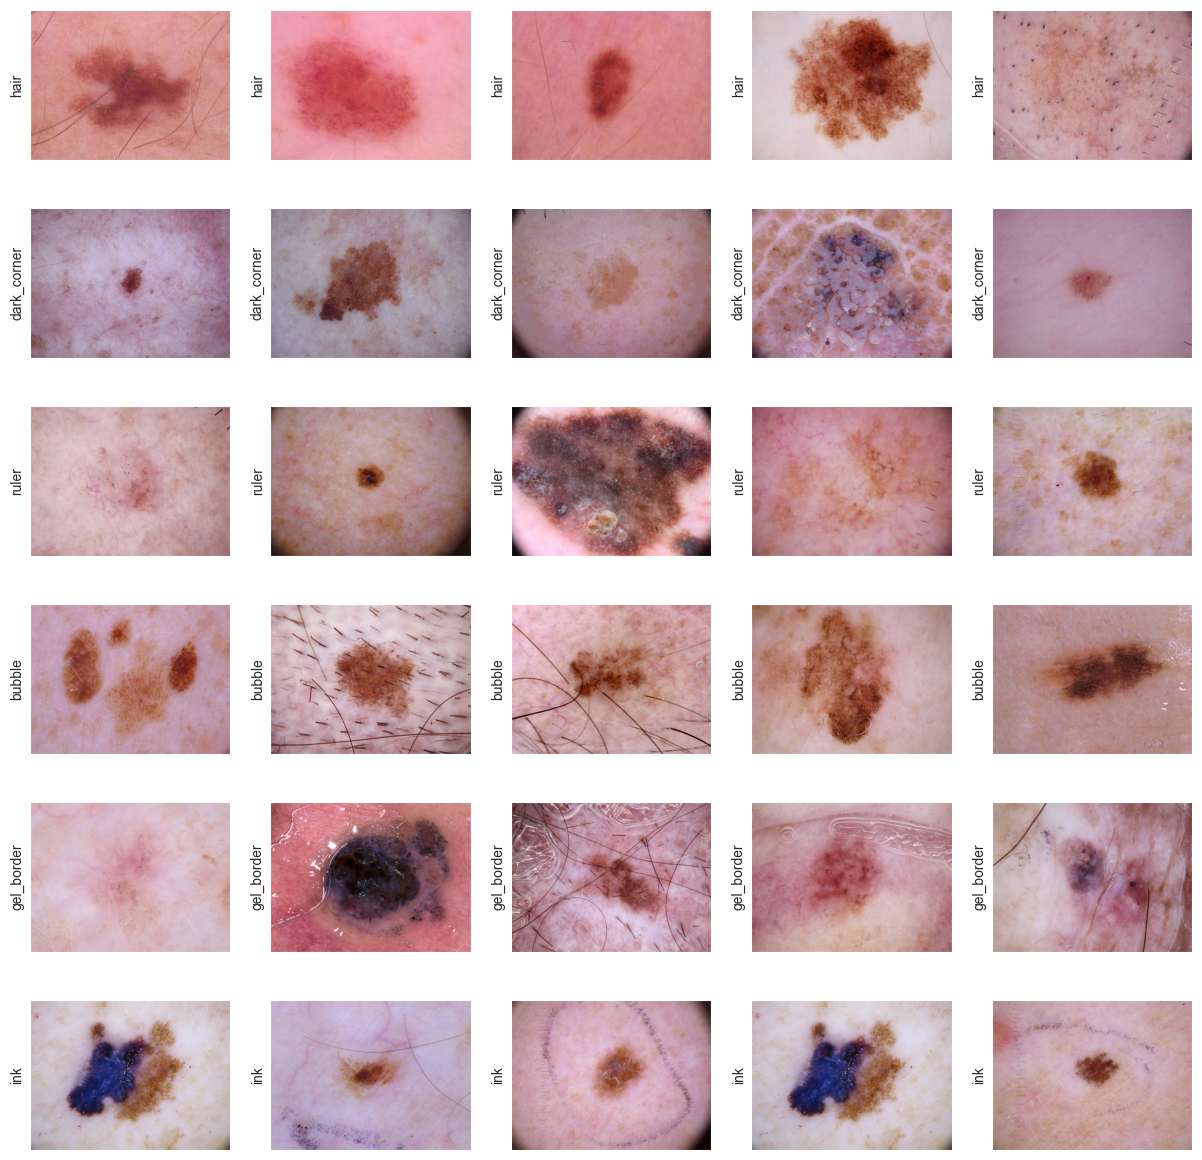

In [5]:
num_imgs = 5

fig, axs = plt.subplots(len(meta_category), num_imgs, figsize=(15,15))

for row, category in enumerate(meta_category):
    imgs = np.random.choice(df_annotate[df_annotate[category] == True]['image_id'], size=num_imgs)
    for col, img in enumerate(imgs):
        img_ = np.asarray(Image.open(f"{img_dir}{img}.jpg"))
        axs[row][col].imshow(img_)
        axs[row][col].set(xticks=[], yticks=[], ylabel = category)

### Distribution of the metadata per class

We calculate the percentage of the number of instances where the metadata category such as 'hair' is present 

In [6]:
cols_groupby = ['dx']+meta_category
df_groupby = df_annotate[cols_groupby].groupby(['dx'])
df_groupby = df_groupby.sum()/df_groupby.count() * 100
df_groupby

,hair,dark_corner,ruler,bubble,gel_border,ink
dx,,,,,,
akiec,40.512821,12.307692,22.051282,12.307692,4.102564,1.538462
bcc,34.591195,25.471698,21.069182,12.264151,1.886792,1.572327
bkl,31.976744,31.540698,19.476744,12.063953,1.744186,0.145349
df,39.189189,33.783784,21.621622,6.756757,1.351351,0.000000
mel,27.637444,37.444279,21.693908,15.007429,2.377415,1.188707
nv,32.906627,11.646586,8.132530,7.379518,1.004016,0.502008
vasc,22.077922,20.779221,11.688312,1.298701,5.194805,0.000000


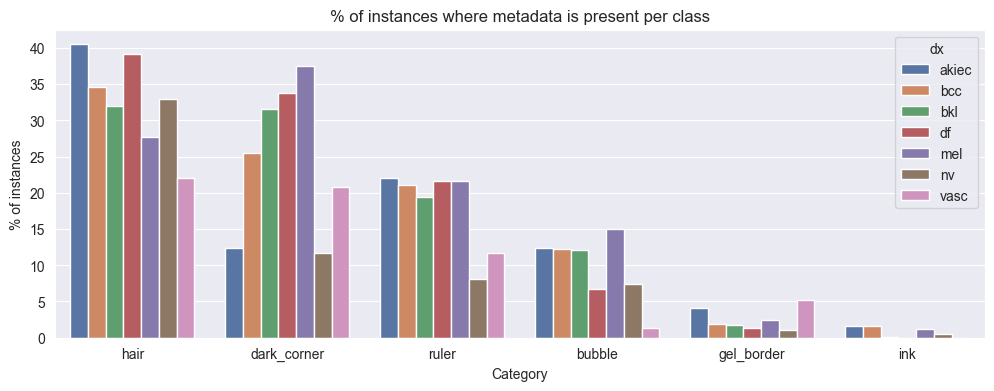

In [7]:
df_melted = pd.melt(df_groupby.reset_index(), id_vars = 'dx')
plt.figure(figsize=(12, 4))
axs = sns.barplot(df_melted, x='variable', y = 'value', hue='dx')
_ = axs.set(xlabel='Category',
            ylabel='% of instances', 
            title='% of instances where metadata is present per class')